# Principal Component Analysis with Cancer Data

In [455]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [456]:
data=pd.read_csv("breast-cancer-wisconsin-data.csv")
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [457]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [458]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [459]:
data.shape

(699, 11)

In [460]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [461]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column`

In [462]:
data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [463]:
data[data.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [464]:
data.drop_duplicates(keep='first',inplace=True)

In [465]:
data

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [466]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?


In [467]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [468]:
data[data['Bare Nuclei'].str.isnumeric()==False].shape[0]

16

In [469]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values


In [470]:
data['Bare Nuclei'].replace('?',np.nan,inplace=True)
data.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [471]:
data['Bare Nuclei'].fillna(data['Bare Nuclei'].median(),inplace=True)
data['Bare Nuclei'].astype('int64')
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [472]:
data['Bare Nuclei']=data['Bare Nuclei'].astype('int64')
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [473]:
data.astype('int64')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [474]:
data['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [475]:
#REMOVING ID COLUMN
data.drop(columns=['ID'],inplace=True)
data

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [476]:
# Check for correlation of variable
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
Cell Size,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
Cell Shape,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
Normal Nucleoli,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.816787,0.756618,0.715540,0.424111,1.000000


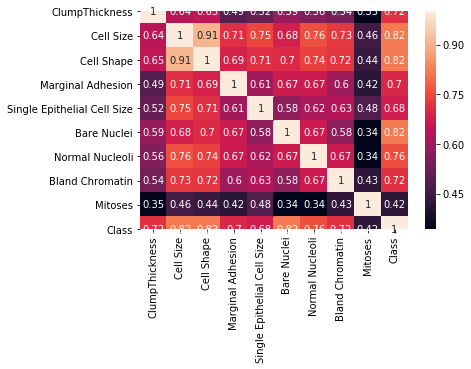

In [477]:
sns.heatmap(data.corr(),annot=True)

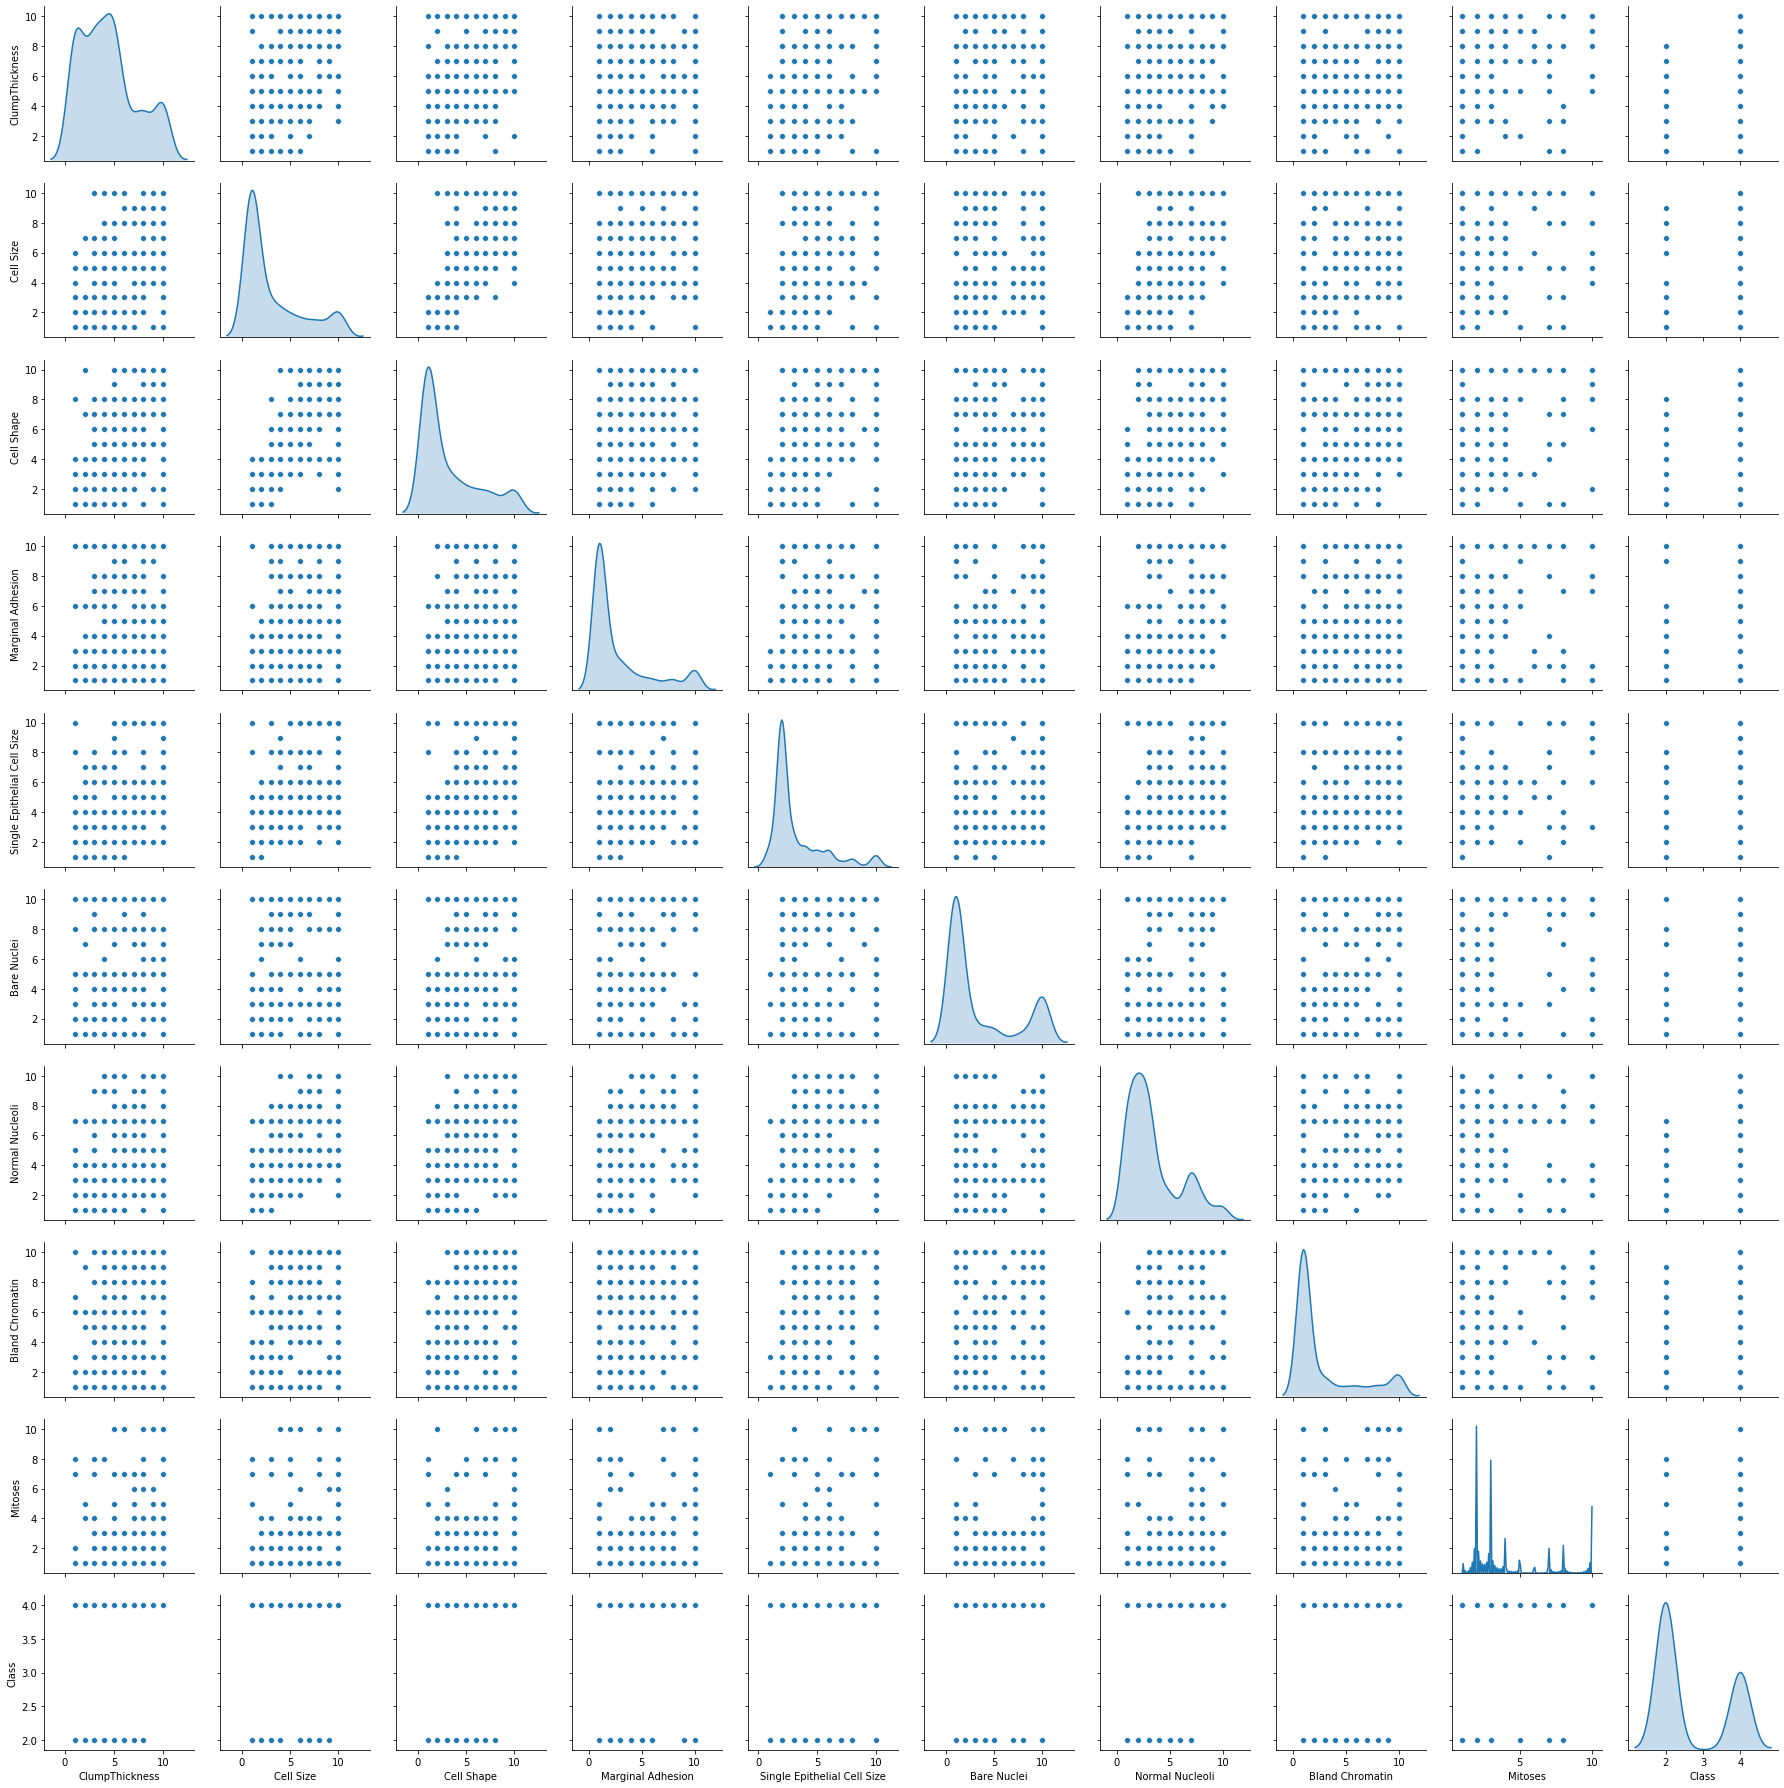

In [478]:
sns.pairplot(data,diag_kind='kde')

In [479]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [480]:
#Let us check for pair plots

In [481]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [482]:
# We could see most of the outliers are now removed.

In [483]:
df=data.drop(columns='Class')
df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


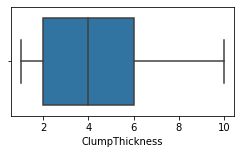

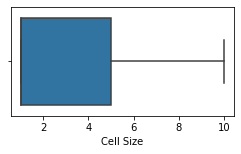

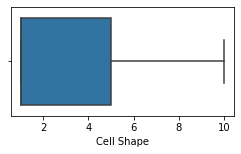

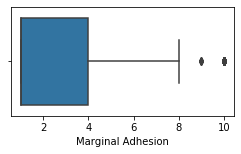

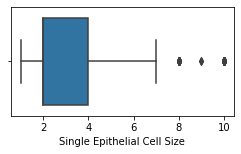

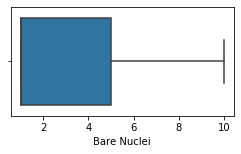

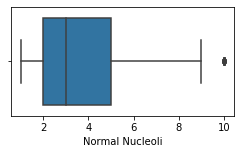

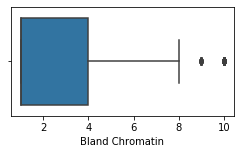

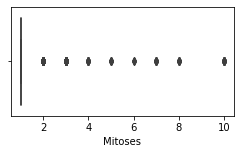

In [484]:
for column in df:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[column])

In [485]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [486]:
outliers=((df < (lower_bound)) | (df > (upper_bound))).sum()
outliers

ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion               60
Single Epithelial Cell Size     52
Bare Nuclei                      0
Normal Nucleoli                 20
Bland Chromatin                 77
Mitoses                        119
dtype: int64

In [487]:
outliers_columns=outliers[outliers>0]
outliers_columns.index

Index(['Marginal Adhesion', 'Single Epithelial Cell Size', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [488]:
df["Mitoses"] = np.where(df["Mitoses"] >3, 3,df['Mitoses'])

In [489]:
df["Mitoses"].unique()

array([1, 3, 2], dtype=int64)

In [490]:
for column in ['Marginal Adhesion', 'Single Epithelial Cell Size', 'Normal Nucleoli','Bland Chromatin']:
    median=data[column].median()
    df.loc[((df[column] < lower_bound[column]) | (df[column] > upper_bound[column])),column] = median
    

In [491]:
outliers=((df < (lower_bound)) | (df > (upper_bound))).sum()
outliers

ClumpThickness                   0
Cell Size                        0
Cell Shape                       0
Marginal Adhesion                0
Single Epithelial Cell Size      0
Bare Nuclei                      0
Normal Nucleoli                  0
Bland Chromatin                  0
Mitoses                        119
dtype: int64

In [492]:
from scipy.stats import zscore

In [493]:
df_scaled=df.apply(zscore)
df_scaled

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.203667,-0.700940,-0.744202,-0.559895,-0.487613,-0.686127,-0.107775,-0.483695,-0.437646
1,0.203667,0.286185,0.270085,1.571715,3.151052,1.804838,-0.107775,0.051935,-0.437646
2,-0.507110,-0.700940,-0.744202,-0.559895,-0.487613,-0.409353,-0.107775,-0.483695,-0.437646
3,0.559055,1.602353,1.622467,-0.559895,0.240120,0.144195,-0.107775,2.730088,-0.437646
4,-0.151722,-0.700940,-0.744202,0.505910,-0.487613,-0.686127,-0.107775,-0.483695,-0.437646
...,...,...,...,...,...,...,...,...,...
694,-0.507110,-0.700940,-0.744202,-0.559895,0.240120,-0.409353,-1.032904,-0.483695,-0.437646
695,-0.862498,-0.700940,-0.744202,-0.559895,-0.487613,-0.686127,-1.032904,-0.483695,-0.437646
696,0.203667,2.260437,2.298658,0.505910,3.151052,-0.132579,2.205047,-0.483695,1.052076
697,-0.151722,1.602353,0.946276,1.038813,0.240120,0.144195,-0.107775,2.194458,-0.437646


# Q6 Create a covariance matrix for identifying Principal components

In [494]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix=np.cov(df_scaled.T)
cov_matrix

array([[1.00144928, 0.64427196, 0.65469961, 0.38235879, 0.43941899,
        0.59169728, 0.5451713 , 0.35880997, 0.42763818],
       [0.64427196, 1.00144928, 0.90673173, 0.51725938, 0.58360856,
        0.68578334, 0.6774206 , 0.42291788, 0.51118074],
       [0.65469961, 0.90673173, 1.00144928, 0.48488695, 0.57013007,
        0.7054026 , 0.66038095, 0.39512093, 0.48189033],
       [0.38235879, 0.51725938, 0.48488695, 1.00144928, 0.42858614,
        0.48122076, 0.53617516, 0.32696962, 0.22633286],
       [0.43941899, 0.58360856, 0.57013007, 0.42858614, 1.00144928,
        0.52112112, 0.50206791, 0.35640516, 0.32206411],
       [0.59169728, 0.68578334, 0.7054026 , 0.48122076, 0.52112112,
        1.00144928, 0.66125813, 0.43853507, 0.45280669],
       [0.5451713 , 0.6774206 , 0.66038095, 0.53617516, 0.50206791,
        0.66125813, 1.00144928, 0.41279962, 0.37820384],
       [0.35880997, 0.42291788, 0.39512093, 0.32696962, 0.35640516,
        0.43853507, 0.41279962, 1.00144928, 0.29452469],


# Q7 Identify eigen values and eigen vector

In [495]:
# Step 2- Get eigen values and eigen vector

In [496]:
eigenvalue,eigenvector=np.linalg.eig(cov_matrix)
print(eigenvalue)

[5.10754089 0.09083588 0.82449528 0.73190161 0.32823659 0.38541671
 0.42727232 0.55149151 0.56585268]


In [497]:
print(eigenvector)

[[-0.33506472 -0.01921343  0.20945412 -0.10912169  0.10804467 -0.29449888
   0.68653737  0.50755237  0.06509761]
 [-0.3987441  -0.71152961  0.08930338 -0.16045601  0.06521114  0.52373728
  -0.11250948  0.08677828 -0.04759669]
 [-0.39406506  0.69504108  0.10476911 -0.19928346 -0.04086882  0.5068376
  -0.13317195  0.17210128 -0.07093616]
 [-0.28477181  0.03612315 -0.58252063 -0.14301994 -0.10213972  0.0903608
   0.3462072  -0.43287931  0.48163641]
 [-0.30996147  0.01195661 -0.20305421 -0.07667775  0.04744814 -0.20089029
   0.14103148 -0.34912771 -0.81992814]
 [-0.36874533 -0.07306246  0.01195352 -0.0100807  -0.76153148 -0.3782331
  -0.33547876  0.13414342  0.07009501]
 [-0.35763043  0.03306455 -0.1766008  -0.07765468  0.61920324 -0.40182077
  -0.49138307  0.095962    0.19557735]
 [-0.25201344  0.02547632 -0.17500911  0.930792    0.03488003  0.14007521
   0.04439687  0.12400673 -0.02553055]
 [-0.26247474  0.04178615  0.70331863  0.15424858  0.07183509 -0.0970673
   0.05049339 -0.5944626  

# Q8 Find variance and cumulative variance by each eigen vector

In [498]:
total = sum(eigenvalue)

In [499]:
sorted_eigenvalues = sorted(eigenvalue, reverse=True)
sorted_eigenvalues

[5.10754089133727,
 0.824495276810367,
 0.73190161342216,
 0.5658526809482987,
 0.5514915133901018,
 0.42727231687143025,
 0.38541671020134316,
 0.3282365939464209,
 0.09083588133347575]

In [500]:
variance_explanation= [(variance/total)*100 for variance in sorted_eigenvalues]
variance_explanation

[56.668326339004935,
 9.147800948691968,
 8.12047135007703,
 6.278153237728351,
 6.118815633368232,
 4.740599753035648,
 4.276210484626578,
 3.641795301865742,
 1.0078269516015161]

In [501]:
cumulative_variance = np.cumsum(variance_explanation)
cumulative_variance

array([ 56.66832634,  65.81612729,  73.93659864,  80.21475188,
        86.33356751,  91.07416726,  95.35037775,  98.99217305,
       100.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [502]:
from sklearn.decomposition import PCA

In [503]:
pca = PCA(n_components=7)
pca_dimension=pca.fit_transform(df_scaled)

In [504]:
pca_dimension

array([[-1.34342004,  0.11493301, -0.14642239, ..., -0.42487425,
         0.29475306, -0.4793637 ],
       [ 2.23827131, -1.73516473, -0.61736051, ...,  1.10742485,
         0.48787709, -0.85378575],
       [-1.47951725, -0.03063372, -0.07165128, ..., -0.10124514,
        -0.28607359, -0.37472572],
       ...,
       [ 3.89012158, -0.01558769, -1.61481481, ...,  1.11557254,
        -0.80846184,  0.69587684],
       [ 1.78402825, -1.11452797,  1.38588189, ..., -0.23267731,
         0.06296266,  1.74776971],
       [ 2.25990315, -1.31109104,  0.11920017, ...,  0.23141973,
         0.1196285 ,  1.73770563]])

In [505]:
pca_dimension.shape

(691, 7)

In [506]:
pca.components_

array([[ 0.33506472,  0.3987441 ,  0.39406506,  0.28477181,  0.30996147,
         0.36874533,  0.35763043,  0.25201344,  0.26247474],
       [ 0.20945412,  0.08930338,  0.10476911, -0.58252063, -0.20305421,
         0.01195352, -0.1766008 , -0.17500911,  0.70331863],
       [-0.10912169, -0.16045601, -0.19928346, -0.14301994, -0.07667775,
        -0.0100807 , -0.07765468,  0.930792  ,  0.15424858],
       [ 0.06509761, -0.04759669, -0.07093616,  0.48163641, -0.81992814,
         0.07009501,  0.19557735, -0.02553055,  0.20098136],
       [-0.50755237, -0.08677828, -0.17210128,  0.43287931,  0.34912771,
        -0.13414342, -0.095962  , -0.12400673,  0.5944626 ],
       [ 0.68653737, -0.11250948, -0.13317195,  0.3462072 ,  0.14103148,
        -0.33547876, -0.49138307,  0.04439687,  0.05049339],
       [-0.29449888,  0.52373728,  0.5068376 ,  0.0903608 , -0.20089029,
        -0.3782331 , -0.40182077,  0.14007521, -0.0970673 ]])

# Q10 Find correlation between components and features

In [507]:
data_combined = pd.DataFrame(pca.components_,columns=df_scaled.columns)
data_combined.shape

(7, 9)

In [508]:

data_combined

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.335065,0.398744,0.394065,0.284772,0.309961,0.368745,0.357630,0.252013,0.262475
1,0.209454,0.089303,0.104769,-0.582521,-0.203054,0.011954,-0.176601,-0.175009,0.703319
2,-0.109122,-0.160456,-0.199283,-0.143020,-0.076678,-0.010081,-0.077655,0.930792,0.154249
3,0.065098,-0.047597,-0.070936,0.481636,-0.819928,0.070095,0.195577,-0.025531,0.200981
4,-0.507552,-0.086778,-0.172101,0.432879,0.349128,-0.134143,-0.095962,-0.124007,0.594463
5,0.686537,-0.112509,-0.133172,0.346207,0.141031,-0.335479,-0.491383,0.044397,0.050493
6,-0.294499,0.523737,0.506838,0.090361,-0.200890,-0.378233,-0.401821,0.140075,-0.097067


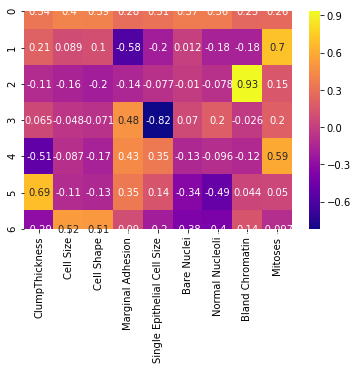

In [509]:
sns.heatmap(data_combined, annot=True,cmap='plasma')